# GMOS SpecPro

In [1]:
# import

import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import astropy.io as ap
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import LogNorm
import os
import re
from astropy.convolution import convolve, convolve_fft, Gaussian1DKernel, Box1DKernel
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from IPython.display import Image
from astropy.io import fits
from decimal import Decimal
from matplotlib.backends.backend_pdf import PdfPages

matplotlib.rcParams.update({'font.size': 18}) 

def Read(filename):

    file=open(filename, 'r') #open file
    data = np.genfromtxt(filename, dtype=None, names=True) #put data into array. arranged like this in txtfile (DataPoint ANG FLUX BACKFLUX)
    file.close #close the file
    a=np.zeros(len(data)) #make an array of zeros that is the length of data array
    b=np.zeros(len(data))
    c=np.zeros(len(data))

    for i in range(len(data)): #looping over range of length of data array
        a[i]=data[i][0] #assign pixel value of ith data point. Data[i] consists of 4 coloums. second index required to sepcfy desired coloum.
        b[i]=data[i][1] #assign wavelength value of ith data point. addition index of [2] required for third coloum.
        c[i]=data[i][2] #assign flux value of the ith data point. index of [3] for fourth coloum. 
    return a,b,c

def ReadBinN(filename,binsize):
    file=open(filename, 'r') #open file
    data = np.genfromtxt(filename, dtype=None, names=True) #put data into array. arranged like this (DataPoint ANG FLUX BACKFLUX)
    file.close #close the file
    g=np.arange(data[0][0],data[len(data)-1][0],binsize)#create an index for every n data points depending on bin size
    atest=[] #specify array but this time instead of filling with zeros the array will be appended
    btest=[]
    ctest=[]
    stepa=0#create variable to be used as intermediate step to sum the values of data[][]
    stepb=0
    stepc=0
    for b in range(len(g)):#now looping over the length of g depending on the bin size
        for i in range(binsize):#now looping over the binsize. Sums up data points between bin index g 
            if g[b]+i >= 3233.0:
                g[b] = g[b]-i
            stepa+=data[g[b]+i][1] #Sums up pix values but this time up to a designated bin size
            stepb+=data[g[b]+i][2] #wv
#           stepc+=data[g[b]+i][2] #flux

        atest.append(stepa/binsize) #divide by binsize to get average.
        btest.append(stepb/binsize)
#       ctest.append(stepc/binsize) 

        stepa=0 #reinitialize stepa and stepb back to 0. dont want previous loop values contributing to next loop
        stepb=0
#       stepc=0

    return atest,btest

In [2]:
path = '/Users/neelsharma/Desktop/ASTRProjects/J08/GMOS/calibrate_spectra/'
v = os.listdir(path)
print('This folder has '+str(len(v))+' MUSE data. Change file name number under "d" to shuffle through files.')

d = 'laxcut_22_qtb.fits' #change file

print('The selected file is: '+d)

flux, header = fits.getdata(path+d, header = True)
wave = header['CRVAL1'] + header['CD1_1']*np.arange(header['NAXIS1'])

fl = flux[1,0,:]
flux_unc = flux[0,0,:]

print(fl)
print(flux_unc)

This folder has 31 MUSE data. Change file name number under "d" to shuffle through files.
The selected file is: laxcut_22_qtb.fits
[ 51.561672   0.49437   -7.600471 ...  31.727465  67.3528   296.11377 ]
[ 4.7319778e+01  3.3343685e-01 -4.4761596e+00 ...  3.5269527e+01
  7.2888412e+01  3.3643121e+02]


# No binning, and binning


In [3]:
#call files and read in and assign ang/flux values

#change bin size
n=2.24 #bin size

/var/folders/qy/trts8c7d3dg4b7k01x7trmlw0000gn/T/ipykernel_14419/2488404055.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


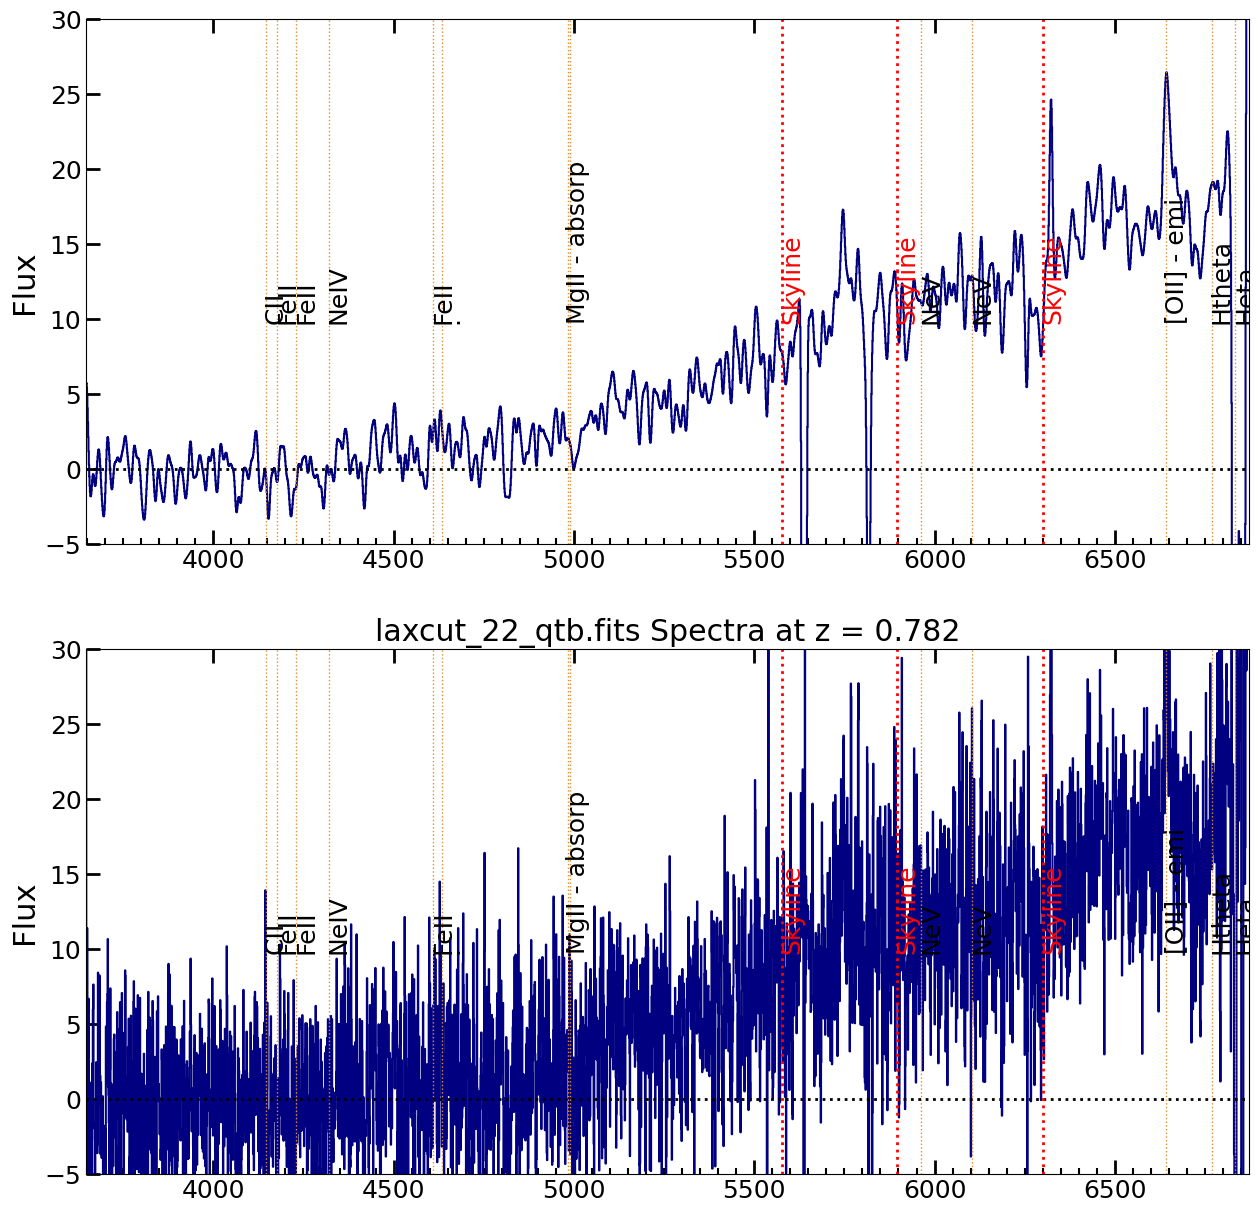

In [4]:
#fig, axs = plt.subplots(1, sharex=True, figsize=(15,8))
fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'height_ratios': [1,1], 'hspace':0.2}, figsize=(15,15))

gauss = Gaussian1DKernel(stddev=4)
boxcar = Box1DKernel(15)
uncon = fl
gau = convolve(fl, gauss)
box = convolve(fl, boxcar)

#-----------------
# Input parameters
#-----------------
for i in range(len(axs)):
    axs[i].set_xlim(np.min(wave),np.max(wave)) #wavelength bounds
    axs[i].set_ylim(-5,30)

convolution = gau #either uncon, gau, or box

yann = 1
yann2 =1
xoffs = 5
line = 10
zed = 0.782
#-----------------

plt.title(d+' Spectra at z = '+str(zed))

axs[0].plot(wave, convolution, drawstyle='steps', color='navy')
axs[1].plot(wave, uncon, drawstyle='steps', color='navy')

lwave = [912,1026,1215.67,1240,1260,1296.3,1323.9,1302,1304,1335,\
         1343.354,1394,1403,1417.237,1427.85,1501.76,1527,1548,1550,1608,\
         1640,1671,1855,1863,1909,2326,2344,2374,2424,2587,\
         2600,2796,2799,3346,3426,3727,3798,3835,3889,3933,3968,\
         3970,4102,4304,4340,4861,4959,5007,5167,5173,5184,\
         5876,5889,5896,6548,6563,6583,6716,6730,6875,7040,\
         7680,8190,8520]
lname = ['Lylim','Lyb','Lya','NV','SiII','CIII/SiIII','CII/NIII','SiII/OI',' ','CII',\
         'OIV','SiIV',' ','SiIII','CIII','SV','SiII','CIV',' ','FeII', \
         'HeII','AlII','AlIII','.','CIII','CII','FeII','FeII','NeIV','FeII',\
         '.','MgII - absorp',' ','NeV','NeV','[OII] - emi','Htheta','Heta','Hzeta','K','H,Hepsilon',\
         ' ','Hdelta','Gb','Hgamma','Hbeta - absorp','[OIII]','[OIII]',' ','MgI',' ',\
         'HeI,NaD','.','.','NII','Halpha','.','SII','.','Bb','TiO',\
         'KI','Na','Cs']

lrun = len(lwave)
for i in range(lrun):
    tmpwl = lwave[i]*(1+zed)
    for o in range(len(axs)):
        axs[o].axvline(x=tmpwl, color='#E08E2F',lw=1,ls=':')
        axs[o].annotate(lname[i],(tmpwl,yann),xytext=(tmpwl-xoffs,line),color='black',rotation=90,clip_on=True)

for i in range(len(axs)):
    axs[i].axvline(x=7600, color='#E08E2F',lw=1,ls=':')
    axs[i].annotate('Ab - absorb/broad',(7600,yann2),xytext=(7600-xoffs,line),color='black',rotation=90,clip_on=True)
    axs[i].axvline(x=6875, color='#E08E2F',lw=1,ls=':')
    axs[i].annotate('Bb',(6875,yann2),xytext=(6875-xoffs,line),color='black',rotation=90,clip_on=True)
    axs[i].axhline(y=0, ls='dotted', color='black', lw=2)

    #Skylines
    skylines = [5577, 5895, 6301, 6875, 7246, 7600]
    
    for o in range(len(skylines)):
        axs[i].axvline(x=skylines[o], color='red', lw=2, ls=':')
        axs[i].annotate('Skyline', (skylines[o], yann2), xytext=(skylines[o]-xoffs,line),color='red',rotation=90,clip_on=True)


    #get tick marks on bottom of the top subplot to make visualization easier
    axs[i].tick_params(labelbottom=True)
    axs[i].xaxis.set_minor_locator(MultipleLocator(50))
    axs[i].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True, direction='in')
    axs[i].tick_params(axis='x', which='minor', direction='in', length=4, width=1.5)
    
    #plt.xticks(np.arange(min(wv), max(wv)+1, 10.0))
    
    # Add axis labels
    axs[i].set_ylabel('Angstrom', fontsize=22)
    axs[i].set_ylabel('Flux', fontsize=22)
    
    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size
    axs[i].tick_params(top=True, length=10,width=2)
plt.tight_layout()
plt.show()

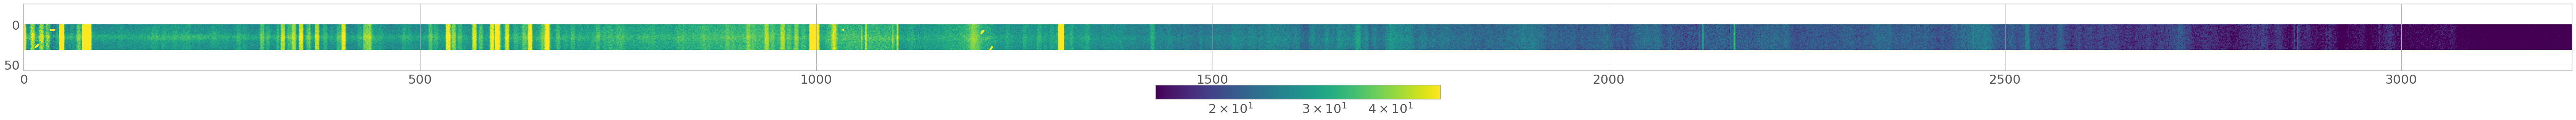

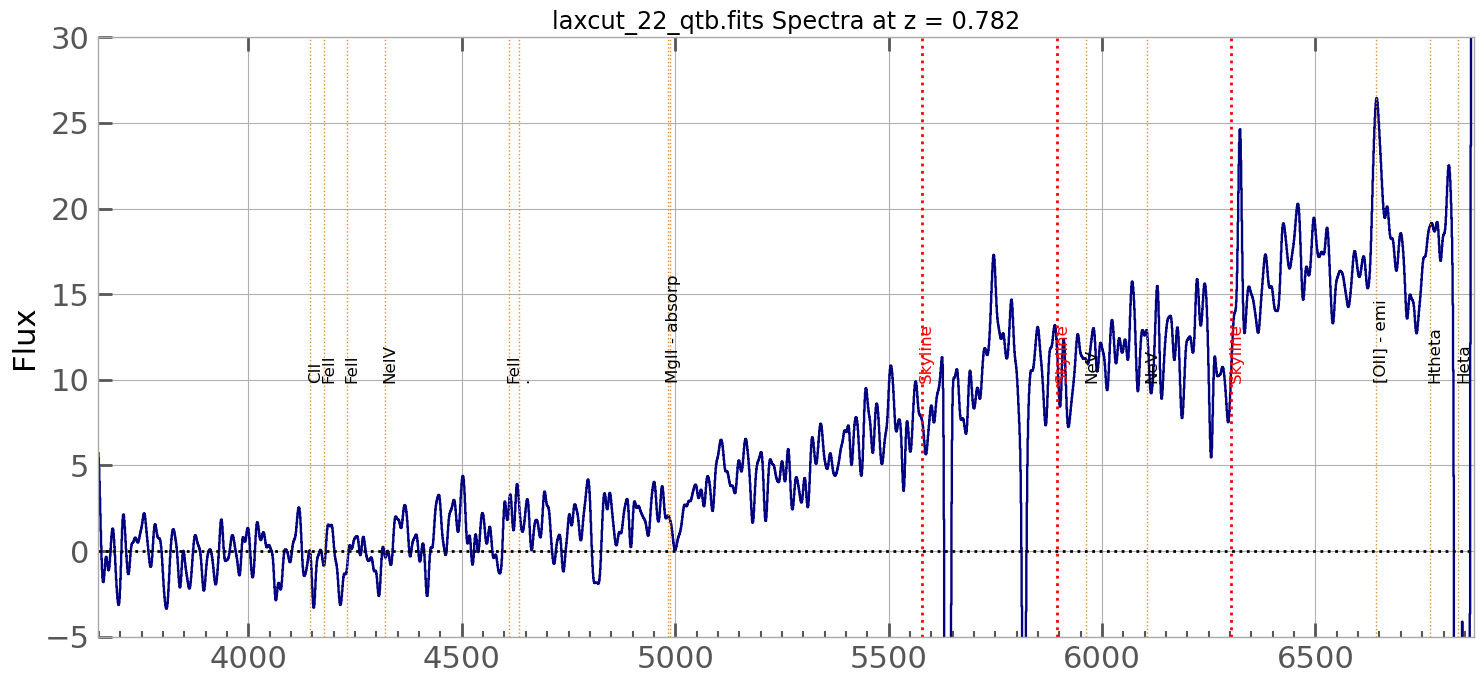

In [5]:
with PdfPages('multipage_pdf.pdf') as pdf:
    '''
    This set of code calls the particular file and extracts data from it
    '''

    number = '22'
    filepath = '/Users/neelsharma/Desktop/ASTRProjects/J08/GMOS/2dspectra_noskysub/flatcut_'+number+'.fits'
    # opens a specific file
    fits.open(filepath) 
    # data(y-value) is obtained from the file
    flux, header = fits.getdata(filepath, header = True) 
    wv = 3652.4915513294 + 1.0026622338852*np.arange(3216)


    '''
    This set of code converts the 2d spectra to a 1d spectra
    '''

    image_file = (filepath)

    plt.style.use(astropy_mpl_style)
    #fits.info(image_file)

    image_data = fits.getdata(image_file, ext=0)

    vmin_minmax, vmax_minmax = np.percentile(image_data, [7, 98.2])

    plt.figure(figsize=(80, 3), frameon=True, clear=False)
    twoDspec = plt.imshow(image_data, cmap='viridis', norm=LogNorm(vmin=vmin_minmax, vmax=vmax_minmax))
    colorbar = plt.colorbar(orientation='horizontal')
    plt.gca().set_aspect(1, adjustable = 'datalim')

    fig, axs = plt.subplots(1, sharex=True, sharey=True, figsize=(15,7))

    plt.title(d+' Spectra at z = '+str(zed))

    gauss = Gaussian1DKernel(stddev=4)
    boxcar = Box1DKernel(15)
    uncon = fl
    gau = convolve(fl, gauss)
    box = convolve(fl, boxcar)

    #-----------------
    # Input parameters
    #-----------------
    axs.set_xlim(np.min(wave),np.max(wave)) #wavelength bounds
    axs.set_ylim(-5,30)

    convolution = gau #either uncon, gau, or box

    yann = 1
    yann2 =1
    xoffs = 5
    line = 10
    zed = 0.782
    #-----------------

    axs.plot(wave, convolution, drawstyle='steps', color='navy')

    lwave = [912,1026,1215.67,1240,1260,1296.3,1323.9,1302,1304,1335,\
            1343.354,1394,1403,1417.237,1427.85,1501.76,1527,1548,1550,1608,\
            1640,1671,1855,1863,1909,2326,2344,2374,2424,2587,\
            2600,2796,2799,3346,3426,3727,3798,3835,3889,3933,3968,\
            3970,4102,4304,4340,4861,4959,5007,5167,5173,5184,\
            5876,5889,5896,6548,6563,6583,6716,6730,6875,7040,\
            7680,8190,8520]
    lname = ['Lylim','Lyb','Lya','NV','SiII','CIII/SiIII','CII/NIII','SiII/OI',' ','CII',\
            'OIV','SiIV',' ','SiIII','CIII','SV','SiII','CIV',' ','FeII', \
            'HeII','AlII','AlIII','.','CIII','CII','FeII','FeII','NeIV','FeII',\
            '.','MgII - absorp',' ','NeV','NeV','[OII] - emi','Htheta','Heta','Hzeta','K','H,Hepsilon',\
            ' ','Hdelta','Gb','Hgamma','Hbeta - absorp','[OIII]','[OIII]',' ','MgI',' ',\
            'HeI,NaD','.','.','NII','Halpha','.','SII','.','Bb','TiO',\
            'KI','Na','Cs']

    lrun = len(lwave)
    for i in range(lrun):
        tmpwl = lwave[i]*(1+zed)
        axs.axvline(x=tmpwl, color='#E08E2F',lw=1,ls=':')
        axs.annotate(lname[i],(tmpwl,yann),xytext=(tmpwl-xoffs,line),color='black',rotation=90,clip_on=True)


    axs.axvline(x=7600, color='#E08E2F',lw=1,ls=':')
    axs.annotate('Ab - absorb/broad',(7600,yann2),xytext=(7600-xoffs,line),color='black',rotation=90,clip_on=True)
    axs.axvline(x=6875, color='#E08E2F',lw=1,ls=':')
    axs.annotate('Bb',(6875,yann2),xytext=(6875-xoffs,line),color='black',rotation=90,clip_on=True)
    axs.axhline(y=0, ls='dotted', color='black', lw=2)

    #Skylines
    skylines = [5577, 5895, 6301, 6875, 7246, 7600]

    for o in range(len(skylines)):
        axs.axvline(x=skylines[o], color='red', lw=2, ls=':')
        axs.annotate('Skyline', (skylines[o], yann2), xytext=(skylines[o]-xoffs,line),color='red',rotation=90,clip_on=True)


    #get tick marks on bottom of the top subplot to make visualization easier
    axs.tick_params(labelbottom=True)
    axs.xaxis.set_minor_locator(MultipleLocator(50))
    axs.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True, direction='in')
    axs.tick_params(axis='x', which='minor', direction='in', length=4, width=1.5)

    #plt.xticks(np.arange(min(wv), max(wv)+1, 10.0))

    # Add axis labels
    axs.set_ylabel('Angstrom', fontsize=22)
    axs.set_ylabel('Flux', fontsize=22)

    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size
    axs.tick_params(top=True, length=10,width=2)

    plt.tight_layout()
    plt.show()

    pdf.savefig(fig)  # saves the current figure into a pdf page


[3652.49155133 3653.49421356 3654.4968758  ... 6874.0453088  6875.04797104
 6876.05063327]
SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 3216 / Axis length                                    NAXIS2  =                   83 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2022-02-02T11:19:04' / Date FITS file was generated                  IRAF-TLM= '2022-02-02T11:46:51' / Time of last modification                     OBJECT  = 'J084648.55'         / Name of the object observed                    RADECSYS= 'FK5     '           / R.A./DEC. coordinate system reference          MJD-OBS =     58905.052952399

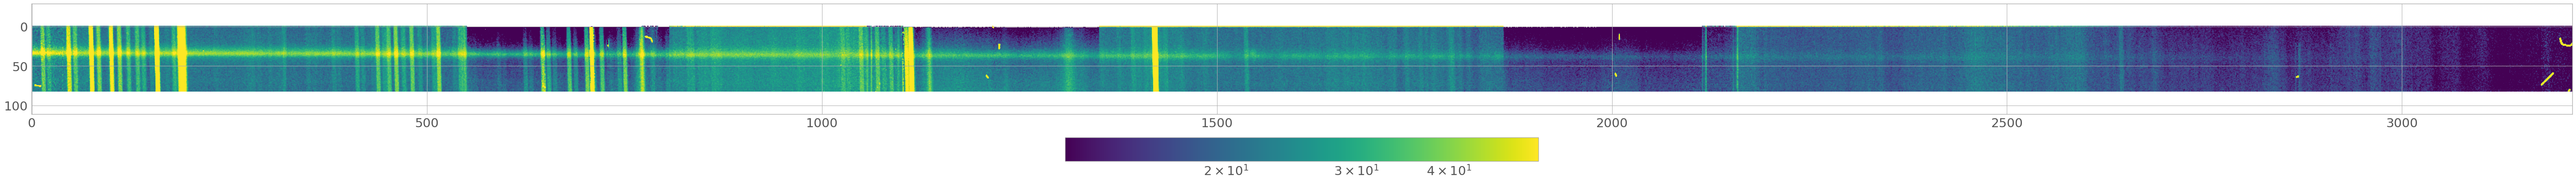

Image Data:
[[22.77498  17.51064  20.737482 ...  9.793723 11.602802 10.217801]
 [26.25133  22.011269 20.077068 ... 10.636142 11.952142 13.779438]
 [23.91664  27.6774   23.768906 ... 10.365732 10.464428  7.794336]
 ...
 [26.520899 23.41433  19.918314 ...  9.453237 11.743909  9.722758]
 [22.712214 20.514318 27.351063 ... 14.260679 12.509307 10.603873]
 [22.269827 26.446486 22.621567 ... 14.128677 12.033951  9.764746]]


Averaged values of the 2d spectra:
[2418.296  2191.839  2170.3042 ... 1943.9927 2626.6133 2834.5923]


[3652.49155133 3653.49421356 3654.4968758  ... 6874.0453088  6875.04797104
 6876.05063327]
SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 3216 / Axis length                                    NAXIS2  =                   83 / Axis length                    

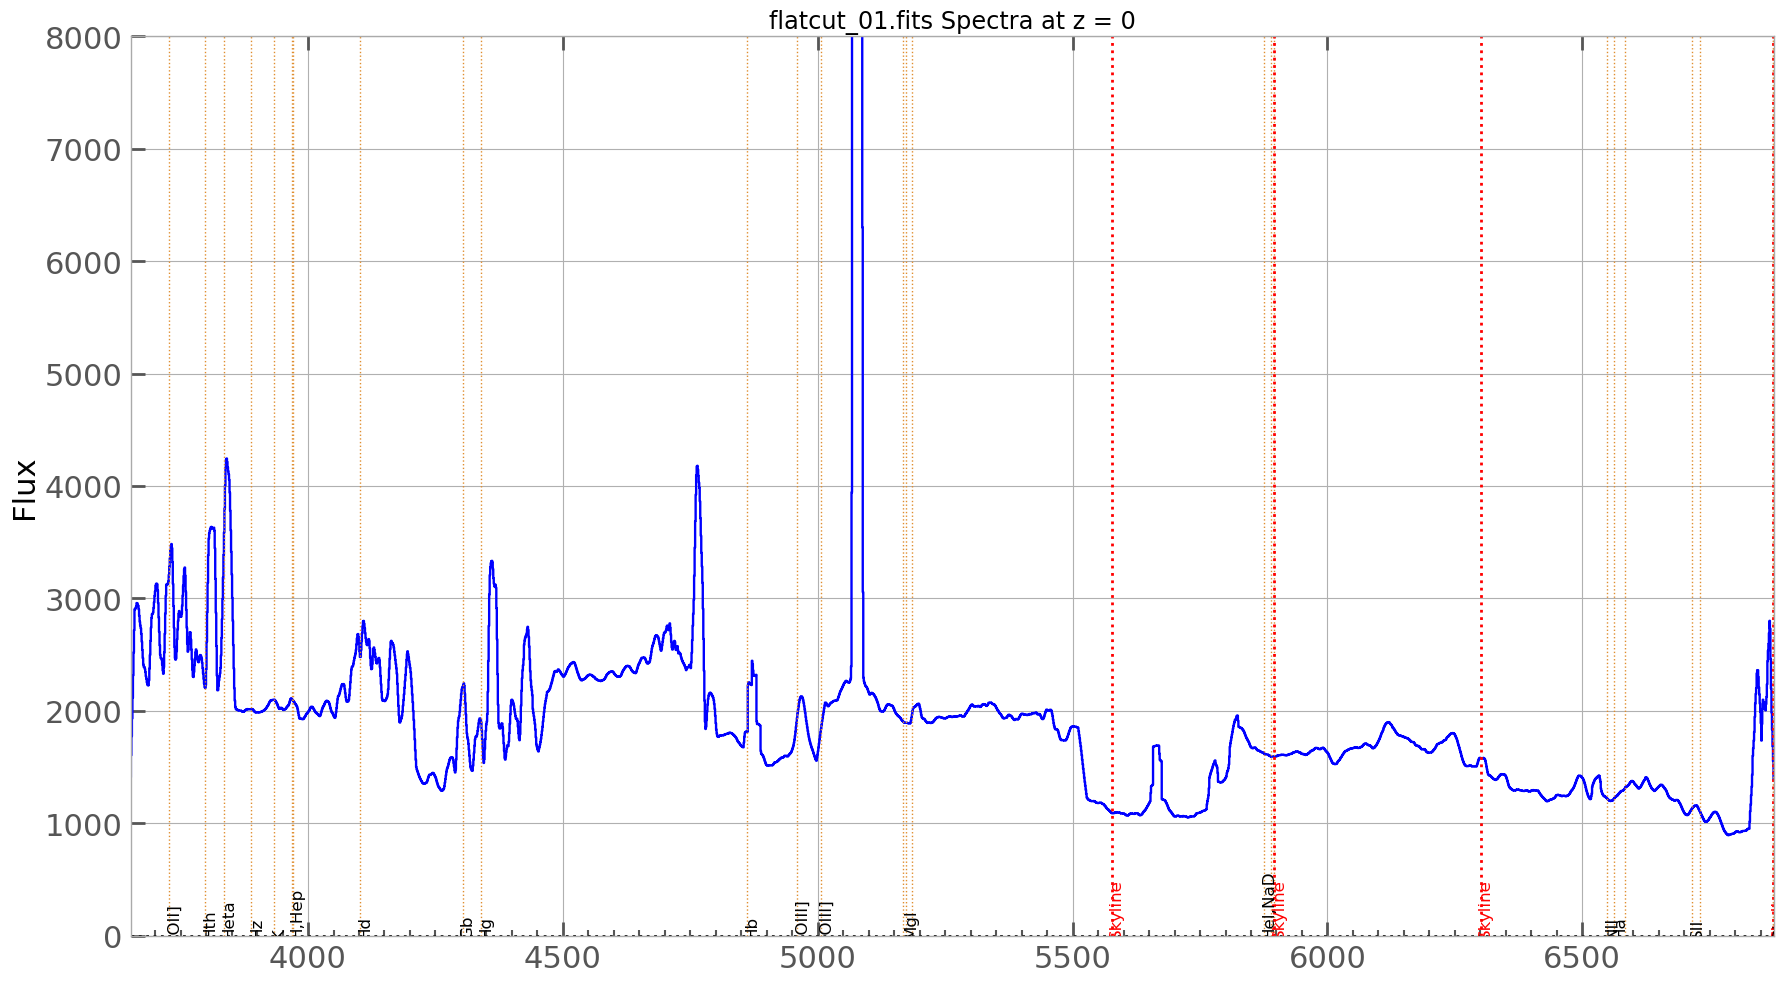

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import astropy.io as ap
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import LogNorm
import os
import re
from astropy.convolution import convolve, convolve_fft, Gaussian1DKernel, Box1DKernel
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from IPython.display import Image
from astropy.io import fits
from decimal import Decimal
from matplotlib.backends.backend_pdf import PdfPages

'''
This set of code lists files for the ease of the user
'''

os.listdir('/Users/neelsharma/Desktop/ASTRProjects/J08/GMOS/2dspectra_noskysub/')

'''
This set of code calls the particular file and extracts data from it
'''
number = '01'
filepath = '/Users/neelsharma/Desktop/ASTRProjects/J08/GMOS/2dspectra_noskysub/flatcut_'+number+'.fits'
# opens a specific file
fits.open(filepath) 
# data(y-value) is obtained from the file
flux, header = fits.getdata(filepath, header = True) 
wv = 3652.4915513294 + 1.0026622338852*np.arange(3216)
print (wv)
# header contains all the information about the file
print (header)
# print (flux) 


'''
This set of code converts the 2d spectra to a 1d spectra
'''

image_file = (filepath)

plt.style.use(astropy_mpl_style)
fits.info(image_file)

image_data = fits.getdata(image_file, ext=0)

print(image_data.shape)

vmin_minmax, vmax_minmax = np.percentile(image_data, [7, 98.2])

plt.figure(figsize=(80, 5), frameon=True, clear=False)
image = plt.imshow(image_data, cmap='viridis', norm=LogNorm(vmin=vmin_minmax, vmax=vmax_minmax))
colorbar = plt.colorbar(orientation='horizontal')
plt.gca().set_aspect(1, adjustable = 'datalim')
plt.show()

print('Image Data:')
print(image_data)
print ("\n")

oned_spec = []
for i in range(len(image_data[0])): 
    column_sum = np.sum(image_data[:,i])
    oned_spec.append(column_sum)
oned_spec = np.array(oned_spec)

print('Averaged values of the 2d spectra:')
print(oned_spec)
print ("\n")


'''
This set of code calls the particular file and extracts data from it
'''

fits.open(filepath)
# data(y-value) is obtained from the file
flux, header = fits.getdata(filepath, header = True) 
# wv = header["CRVAL1"] + header["CD1_1"]*np.arange(header["NAXIS1"])
print (wv)
# header contains all the information about the file
print (header)
# print (flux) 


'''
This set of code is responsible for smoothing the spectra
'''

#change bin size
n = 10
smoothed_flux = flux
# smoothed_flux = gaussian_filter1d(flux, n) #bin size
print(smoothed_flux.shape)

#pix,wv,flux= Read('1D_spectra_txt/slitA022.txt')
# print(smoothed_flux[2,0,:])
# for a 3d array
smoothed_flux = smoothed_flux[1,:] 
# for a 2d array
#smoothed_flux = smoothed_flux[0,:]
# for an array
#smoothed_flux = smoothed_flux[:]

'''
This set of code plots the obtained 1d spectra
'''

fig, axs = plt.subplots(1, sharex=True, figsize=(18,10)) 
# fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'height_ratios': [1,1],'hspace':0.24}, figsize=(15,10), tight_layout=True) 
# plot Ang vs Flux. use drawstyle='steps' to make it have flat tops between data points (helps distinguish better)

# gauss = Gaussian1DKernel (stddev = 2)
# gau = convolve(smoothed_flux, gauss)
boxcar = Box1DKernel(17)
uncon = smoothed_flux
box = convolve(oned_spec, boxcar)
spectra = box #or gau

axs.plot(wv, spectra, drawstyle='steps', color='blue')
lwave = [912,1026,1215.67,1240,1260,1296.3,1323.9,1302,1304,1335,\
         1343.354,1394,1403,1417.237,1427.85,1501.76,1527,1548,1550,1608,\
         1640,1671,1855,1863,1909,2326,2344,2374,2424,2587,\
         2600,2796,2799,3346,3426,3727,3798,3835,3889,3933,3968,\
         3970,4102,4304,4340,4861,4959,5007,5167,5173,5184,\
         5876,5889,5896,6548,6563,6583,6716,6730,6875,7040,\
         7680,8190,8520]
lname = ['Lylim','Lyb','Lya','NV','SiII','CIII/SiIII','CII/NIII','SiII/OI',' ','CII',\
         'OIV','SiIV',' ','SiIII','CIII','SV','SiII','CIV',' ','FeII', \
         'HeII','AlII','AlIII','.','CIII','CII','FeII','FeII','NeIV','FeII',\
         '.','MgII',' ','NeV','NeV','[OII]','Hth','Heta','Hz','K','H,Hep',\
         ' ','Hd','Gb','Hg','Hb','[OIII]','[OIII]',' ','MgI',' ',\
         'HeI,NaD','.','.','NII','Ha','.','SII','.','Bb','TiO',\
         'KI','Na','Cs']


#------------------#
# Input parameters
#------------------#

# wavelength bounds
axs.set_xlim(np.min(wv), np.max(wv))

# flux bounds
ymin = 0
ymax = 8000
axs.set_ylim(ymin, ymax) 

yann = 2000
yann2 = 2000
xoffs = 5
zed = 0

#-----------------

plt.title('flatcut_'+number+'.fits'+' Spectra at z = '+str(zed))

label_placement = (ymax-ymin)/2
lrun = len(lwave)
for i in range(lrun):
    tmpwl = lwave[i]*(1+zed)
    axs.axvline(x=tmpwl, color='#E08E2F',lw=1,ls=':')
    axs.annotate(lname[i],(tmpwl,yann),xytext=(tmpwl-xoffs,line),color='black',rotation=90,clip_on=True)

axs.axvline(x=7600, color='#E08E2F',lw=1,ls=':')
axs.annotate('Ab - absorb/broad',(7600,yann2),xytext=(7600-xoffs,line),color='black',rotation=90,clip_on=True)
axs.axvline(x=6875, color='#E08E2F',lw=1,ls=':')
axs.annotate('Bb',(6875,yann2),xytext=(6875-xoffs,line),color='black',rotation=90,clip_on=True)
axs.axhline(y=0, ls='dotted', color='black', lw=2)

#Skylines
skylines = [5577, 5895, 6301, 6875, 7246, 7600]

for o in range(len(skylines)):
    axs.axvline(x=skylines[o], color='red', lw=2, ls=':')
    axs.annotate('Skyline', (skylines[o], yann2), xytext=(skylines[o]-xoffs,line),color='red',rotation=90,clip_on=True)


#get tick marks on bottom of the top subplot to make visualization easier
axs.tick_params(labelbottom=True)
axs.xaxis.set_minor_locator(MultipleLocator(50))
axs.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True, direction='in')
axs.tick_params(axis='x', which='minor', direction='in', length=4, width=1.5)

#plt.xticks(np.arange(min(wv), max(wv)+1, 10.0))

# Add axis labels
axs.set_ylabel('Angstrom', fontsize=22)
axs.set_ylabel('Flux', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
axs.tick_params(top=True, length=10,width=2)
plt.tight_layout()
plt.show()

In [7]:
#what is error on the redshift?  Error dominated by wavelength calibration.
#For object #A026, the highest and lowest redshifts we can tolerate are:

zlo = 0.8134
zhi = 0.8146
lrest = 6000.

#what is the delta lambda/lambda?
lamlo=(zlo+1.)*lrest
lamhi=(zhi+1.)*lrest
del_lam = lamhi-lamlo

print('MMT Binospec Redshifts are good to z +/- ',del_lam/lrest)

MMT Binospec Redshifts are good to z +/-  0.0011999999999998182
